### Source 
[Here](https://github.com/Xianzhiwang1/CS0451-page-site/tree/main/posts/) is a link to the source code for this gradient descent blog post.

### Reference
[Here](https://middlebury-csci-0451.github.io/CSCI-0451/lecture-notes/gradient-descent.html) is a link to the main reference we are using when crafting this blog post.

### Introduction
Let's recall what problem we are investigating. We are working on the *empirical risk minimization* problem, which involves finding a weight vector `w`, that satisfy the following general form:
#### $$ \hat{w} = \arg \min_{w} L(w). $$

Also, remember from our previous blog post that our data includes a feature matrix `X`, which is a $n\times p$ matrix with entries being real numbers. The number $n$ represents the number of distinct observations, and we have $n$ rows in `X`. $p$ is the number of features. Our data also have a `y`, which is called target vector and lives in $\mathbb{R}^n$. The target vector gives a label for each observation.

We also need some formulas that's computed using pen and paper by our friends in the math department. First, we remember this piece of notation 
$ f_w(x) = \langle w, x \rangle $ and we could obtain the following:
#### $$ \nabla L(w) = \nabla ( \frac{1}{n} \sum_{i=1}^{n} \ell [ f_w(x_i), y_i ] ). $$
And remember $ \hat{y_i} = \langle w, x_i \rangle $ (another piece of notation!), the logistic loss we are using is 
#### $$ \ell(\hat{y}, y) = -y \log \sigma (\hat{y}) - (1-y) \log(1-\sigma(\hat{y})), $$
where $ \sigma() $ denotes the logistical sigmoid function. as demonstrated in the link under the *Reference* heading above, we have
#### $$ \frac{d \ell(\hat{y},y)}{d \hat{y}} = \sigma (\hat{y}) -y. $$ 
Therefore, with some effort, one can do this computation and obtain the following formula:
#### $$ \nabla L(w) = \frac{1}{n} \sum_{i=1}^{n} (\sigma(\hat{y_i}) - y_i) x_i, $$
and this will help us to implement the gradient of the empirical risk for logistic regression in python code using `numpy` library.




In [1]:
%load_ext autoreload
%autoreload 2

We start by importing the relavant libraries and creating some data points using the `make_blobs` function that we imported from `sklearn.datasets`. We would like to create some non-separable data, which means graphically in 2 dimension, we cannot draw a straight line to separate the data points of the two different classes (as indicated by the color). Notice that the horizontal axis is Feature 1, and the vertical axis is Feature 2. 

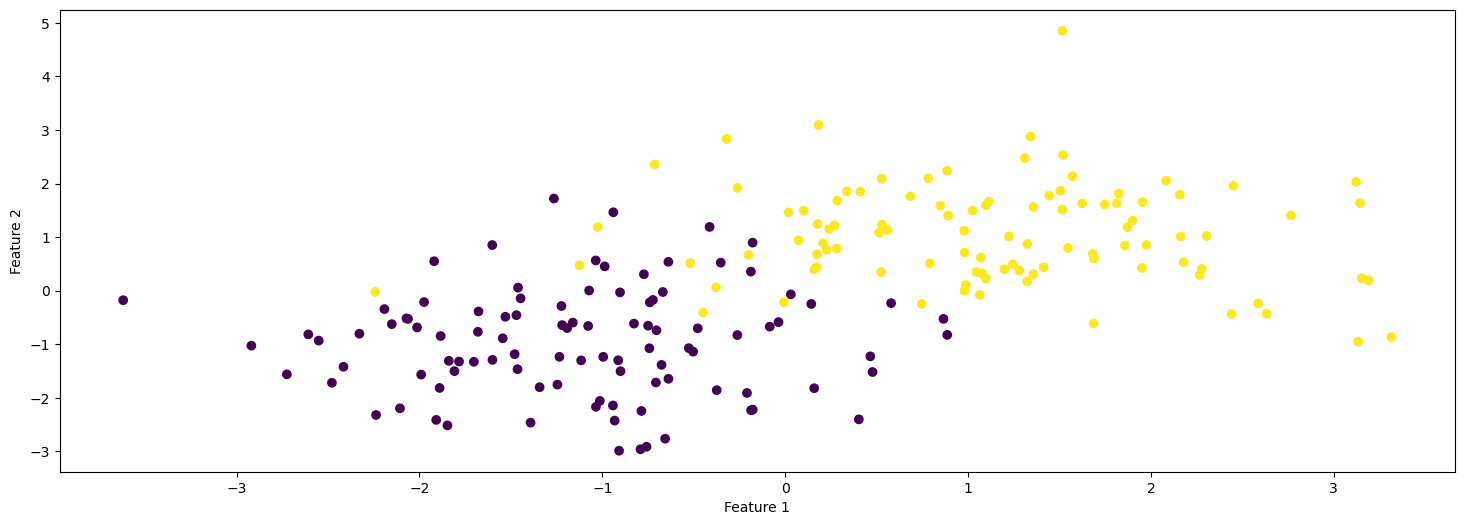

In [40]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (18, 6)

import numpy as np
np.random.seed(42)
np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

After we generated the data, which includes a feature matrix `X`, which is a $n\times p$ matrix with entries being real numbers. The number $n$ represents the number of distinct observations, and we have $n$ rows in `X`. $p$ is the number of features. Our data also have a `y`, which is called target vector and lives in $\mathbb{R}^n$. The target vector gives a label, value, or outcome for each observation.
# Implementing Regular Gradient Descent
We start by calling the function `fit`, which implements regular gradient descent, and we call it regular to distinguish it from Stochastic gradient descent, which we implement next. We are interested in finding the value for `w_`, and `fit` function uses the following key equation to iteratively update  `w_` until we have a "good enough"  `w_` or we reach the user-specified maximum number of iterations allowed, whichever comes first:
#### $$ w^{(t+1)} \leftarrow w^{(t)} - \alpha \cdot \nabla L(w^{(t)}), $$ 
where $\nabla L(w)$ is given by the following equation:
##### $$ \nabla L(w) = \frac{1}{n} \sum_{i=1}^{n} \nabla \ell(f_{w}(x_i), y_i)$$


In [6]:
from solutions_logistic import LogisticRegression 
LR = LogisticRegression()
X_ = LR.pad(X)

# inspect the fitted value of w
LR.fit(X, y, alpha = 0.01, max_epochs = 2000)
print(LR.w_)

[ 1.6041937   1.51398202 -0.23370397]


After calling the function `fit`, we obtain the weight vector `w_`,  but are they doing what they are supposed to do? How big is the loss for this perticular case? We could visualize this result by plotting the line that hopefully separates the data points in a intuitive way. See the picture on the *left*. Now we would like to find out about how the empirical loss evolves as the number of iteration goes up. Let's plot this in the picture on the *right*.

In [14]:
np.random.seed(42)
# pick a random weight vector and calculate the loss
w = .5 - np.random.rand(p_features)
# fig = plt.scatter(X_[:,0], X_[:,1], c = y)
# xlab = plt.xlabel("Feature 1")
# ylab = plt.ylabel("Feature 2")
# f1 = np.linspace(-3, 3, 101)
# p = plt.plot(f1, (LR.w_[2] - f1*LR.w_[0])/LR.w_[1], color = "black")
# title = plt.gca().set_title(f"Loss = {LR.last_loss}")

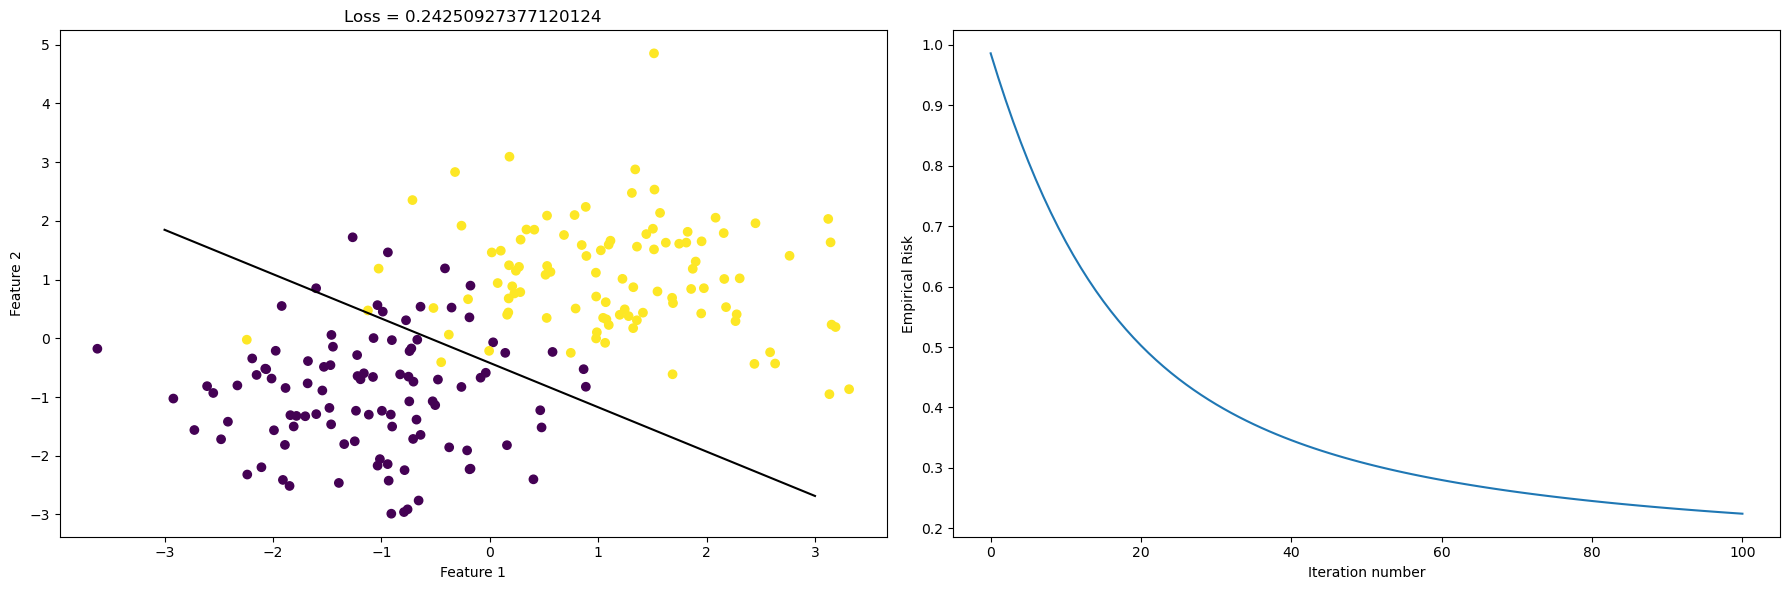

In [43]:
fig, axarr = plt.subplots(1, 2)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {LR.last_loss}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (LR.w_[2] - f1*LR.w_[0])/LR.w_[1], color = "black")

axarr[1].plot(LR.loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")
plt.tight_layout()

### Accuracy of regular gradint descent
Again, we draw the scatter plot and the fitted line on the left, and on the right, we plot the evolution of the accuracy score as the number of iteration increases. 

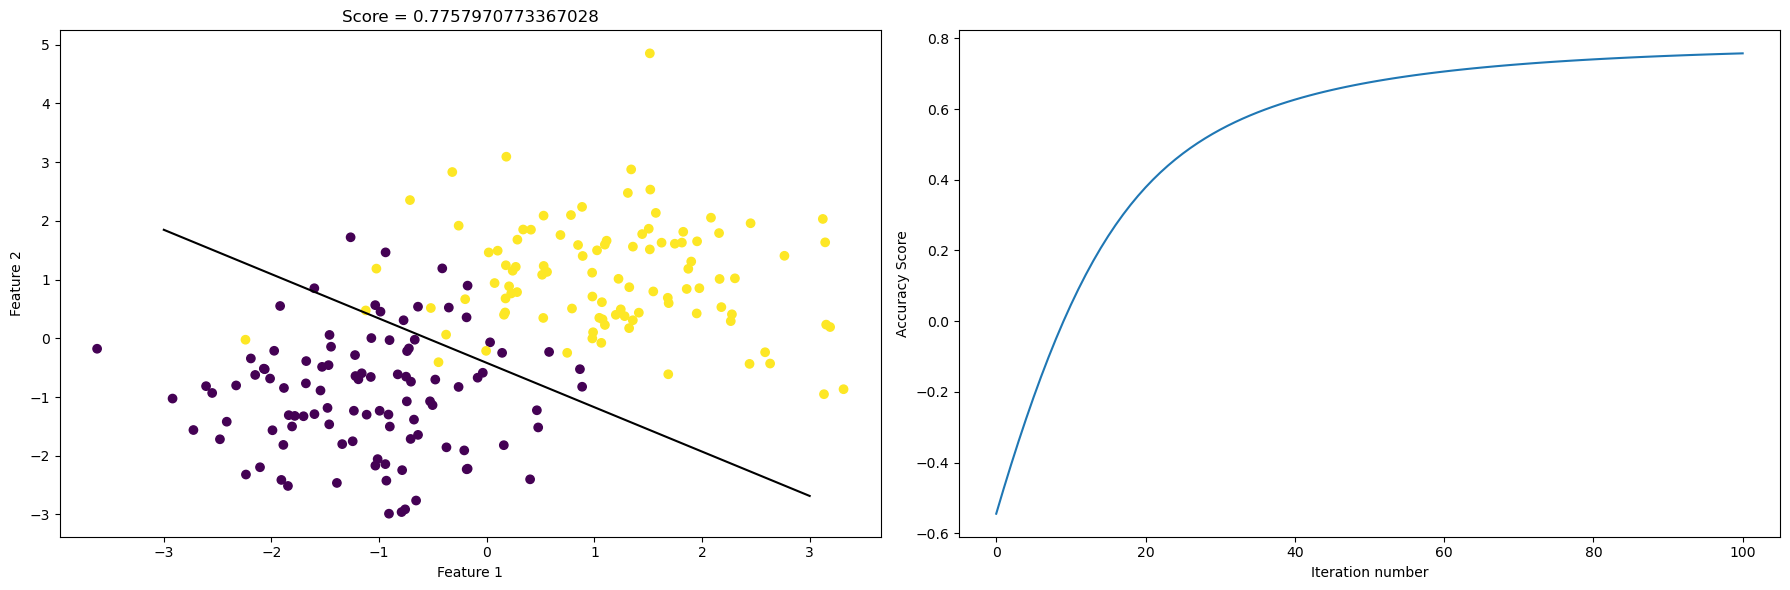

In [42]:
myScore = LR.score(X_,y)

fig, axarr = plt.subplots(1, 2)
axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Score = {myScore}")
f1 = np.linspace(-3, 3, 101)
p = axarr[0].plot(f1, (LR.w_[2] - f1*LR.w_[0])/LR.w_[1], color = "black")
axarr[1].plot(LR.score_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Accuracy Score")
plt.tight_layout()

We could also print out the vector `y` and the predicted vector given by the function `predict()`. In this way, we could have a look "under the hood" and obtain a rough sense how good is our prediction.

In [10]:
print(y)
print(LR.predict(X_))

[0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1
 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0
 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0
 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0]
[0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1
 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0
 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0
 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0]


# Implementing Stochastic Gradient Descent
Here, by "Stochastic" we just mean we introduce a certain amount of randomness to our gradient descent step. The modification from the regular gradient descent is as follows. We pick a random subset $S \subset [n]$ and we let 
##### $$ \nabla_S L(w) = \frac{1}{|S|} \sum_{i \in S} \nabla \ell(f_{w}(x_i), y_i).$$
And the rest is business as usual. We deem our weights `w`  as "good enough" when: either the user-specified maximum number of iteration is reached, or the current empirical risk function is "close enough" to the one from the previous iteration. With the mathematics technicality out of the way, let's visualize the scatter plot, the best-fit-line, and the evolution of the empirical risk, and the evolution of the accuracy score all in one go. 

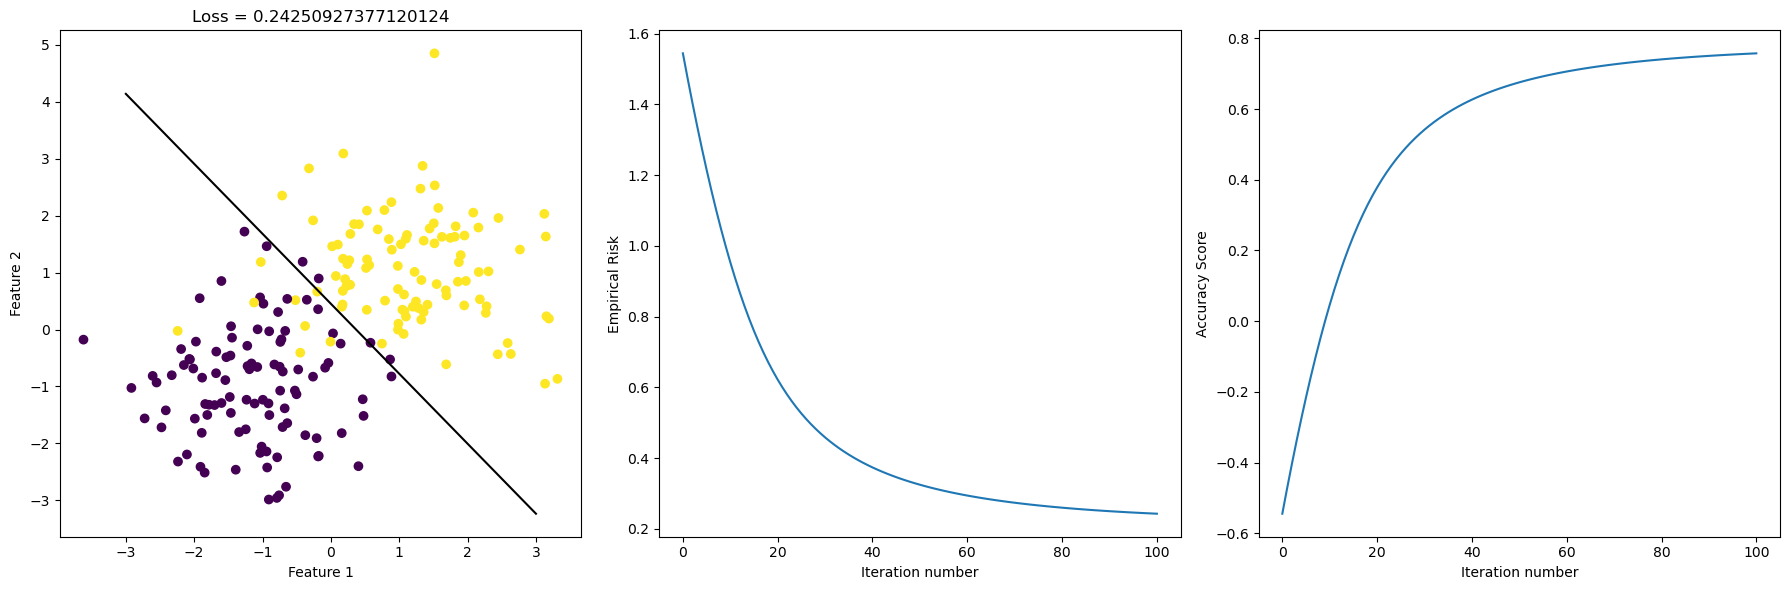

In [41]:

LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = .05) 

loss = LR.stochastic_loss_history[-1]

fig, axarr = plt.subplots(1, 3)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {loss}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (LR.omega_[2] - f1*LR.omega_[0])/LR.omega_[1], color = "black")

axarr[1].plot(LR.stochastic_loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")

axarr[2].plot(LR.score_history)
axarr[2].set(xlabel = "Iteration number", ylabel = "Accuracy Score")
plt.tight_layout()

# Illustration
Having seen how regular gradient descent and stochastic gradient descent perform, we could add a momentum feature to the stochastic gradient descent. Then we have the choice of selecting `momentum = True` when we call the function `fit_stochastic`. Hence, we could compare the three versions of gradient descent and plot their respective empirical risk (loss) evolution in one picture, where the horizontal axis is number of iterations, and the vertical axis is empirical risk.

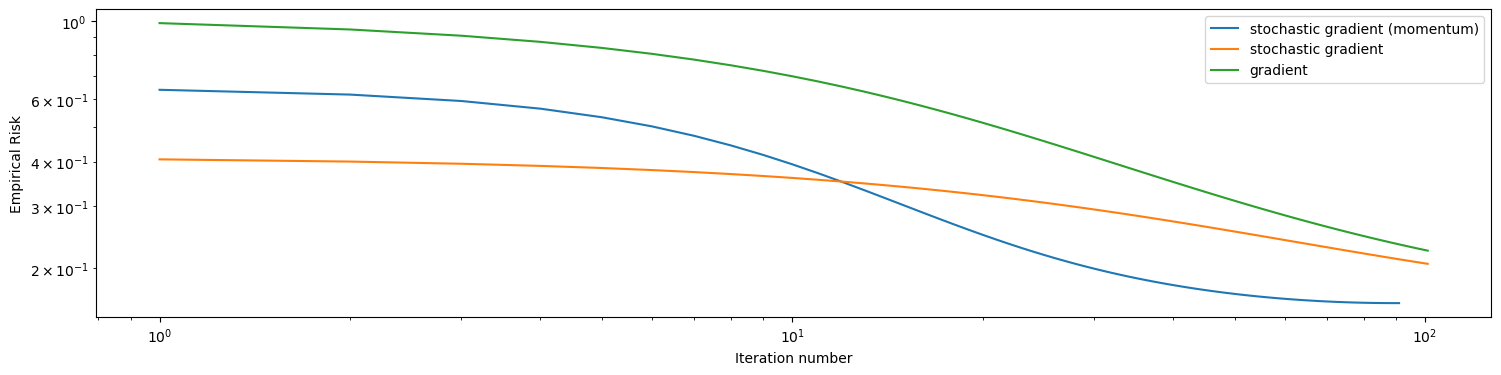

In [38]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  momentum = True, 
                  batch_size = 10, 
                  alpha = 0.05) 

num_steps = len(LR.stochastic_loss_history)
plt.plot(np.arange(num_steps) + 1, LR.stochastic_loss_history, label = "stochastic gradient (momentum)")

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = 0.05)

num_steps = len(LR.stochastic_loss_history)
plt.plot(np.arange(num_steps) + 1, LR.stochastic_loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit(X, y, alpha = .05, max_epochs = 100)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

xlab = plt.xlabel("Iteration number")
ylab = plt.ylabel("Empirical Risk")
plt.loglog()

legend = plt.legend() 